In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import scipy.io 
import numpy as np
from scipy import signal

mat = scipy.io.loadmat('/content/drive/MyDrive/Impulse_19/Task#2/Task2.mat')
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'A', 'Image'])


**Load the input**

In [3]:
A = mat['A']
image = mat['Image']
A = A.reshape((25, 256))              # flatten the input image and DCT
image = image.reshape((25,))

print(A.shape)
print(image.shape)

(25, 256)
(25,)


**ORTHOGONAL MATCHING PURSUIT ALGORITHM**

In [4]:
def OMP(A, y, non_zero_terms):
  residue = y
  x = np.zeros(A.shape[1])
  
  for i in range(non_zero_terms):
    dot = np.dot(A.T, residue)            # dot product of all columns of A with y
    dot = dot.reshape((-1,))        

    index = np.argmax(np.abs(dot))        # consider maximum dot product(atom with strongest influence) and ensure that already considered atom in not considered again
    while(x[index] != 0): 
      dot[index] = 0
      index = np.argmax(np.abs(dot))

    x[index] = dot[index]                           # update x
    residue = residue - dot[index] * A[:, index]    # update the residue
  
  return x

**Sparse encoding**

In [5]:
non_zero_terms = 50

x = OMP(A, image, non_zero_terms)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


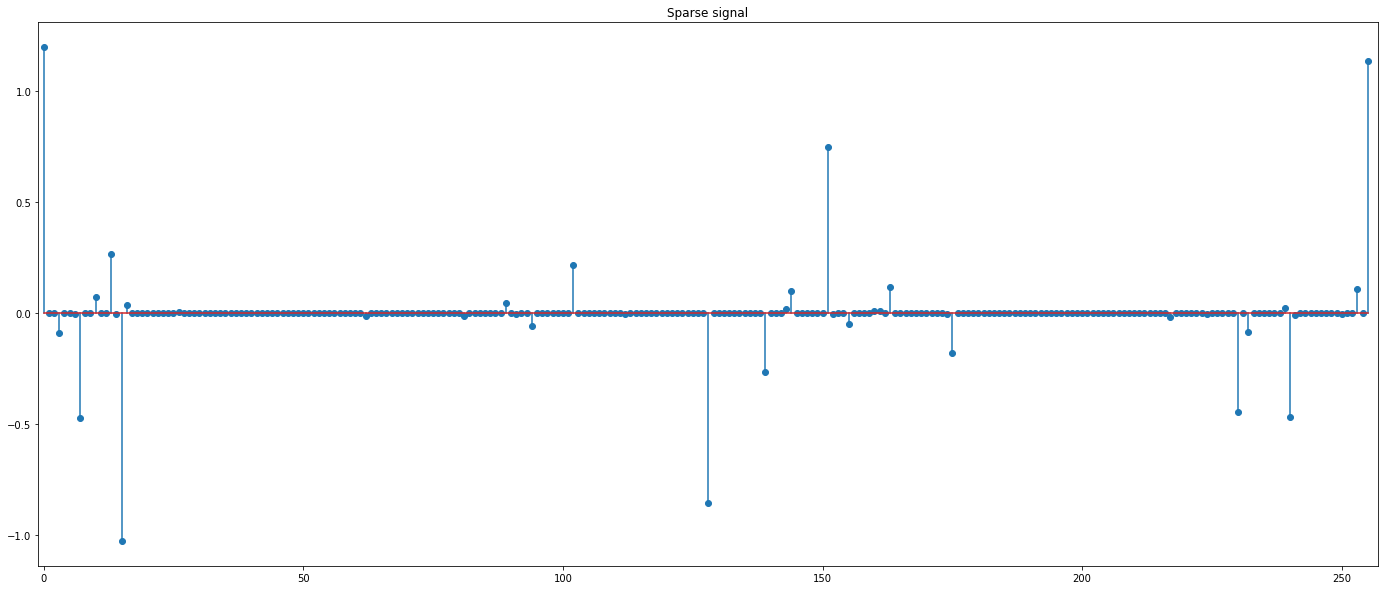

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 10))
plt.xlim(-1, A.shape[1] + 0.9)
plt.title("Sparse signal")
plt.stem(x)
plt.show()

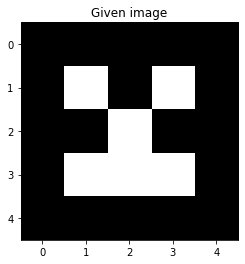

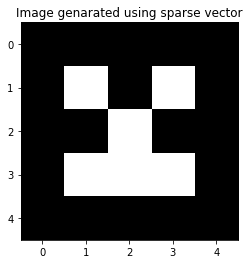

In [7]:
pred = np.matmul(A, x)

pred = pred.reshape((5, 5))
image = image.reshape((5, 5))

plt.imshow(image, cmap = 'gray')
plt.title('Given image')
plt.show()
plt.imshow(pred, cmap = 'gray')
plt.title('Image genarated using sparse vector')
plt.show()

In [8]:
import cv2

# np.save('/content/drive/MyDrive/Impulse_19/Task#2/Task#2_x.npy', x)
# cv2.imwrite('/content/drive/MyDrive/Impulse_19/Task#2/reconstructedImg.jpg', pred) 